<a href="https://colab.research.google.com/github/fshnkarimi/FaceEmotionRecognition/blob/main/FaceEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install FER

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 5.0 MB/s 


In [15]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
# Put in the location of the video file that has to be processed
location_videofile = "/content/afshin_face.mp4"

In [16]:
# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [17]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.15 fps, 274 frames, 9.09 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/afshin_face_output.mp4
100%|██████████| 274/274 [05:19<00:00,  1.17s/frames]
INFO:fer:Completed analysis: saved to output/afshin_face_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 18%
INFO:fer:Compressing: 36%
INFO:fer:Compressing: 54%
INFO:fer:Compressing: 72%
INFO:fer:Compressing: 91%
INFO:fer:Zip has finished


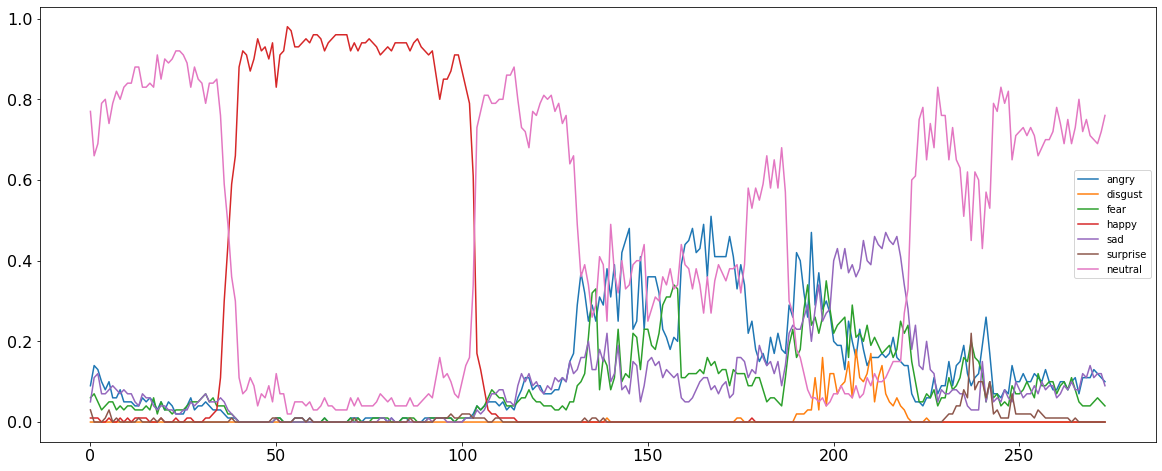

In [18]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [21]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

Human Emotions  Emotion Value from the Video
0          Angry                         35.60
1        Disgust                          2.49
2           Fear                         23.62
3          Happy                         61.32
4            Sad                         27.74
5       Surprise                          1.76
6        Neutral                        120.66

In [20]:
from moviepy.editor import *

path="/content/output/afshin_face_output.mp4" 

clip=VideoFileClip(path)
clip.ipython_display(width=560, maxduration=90)

100%|██████████| 275/275 [00:04<00:00, 65.35it/s]
